# Titanic - Machine Learning from Disaster
https://www.kaggle.com/competitions/titanic


# Ahoy, welcome to Kaggle! You’re in the right place.

# The Challenge

# What Data Will I Use in This Competition?

# So... how do i improve mys score?

# Data

# Plan

# Illustration du naufrage du Titanic

In [1]:
from IPython.display import Image
Image(url = 'https://images.squarespace-cdn.com/content/5006453fe4b09ef2252ba068/1351660113175-514SN9PXFWB9N2MNB8DV/TItanic-Survival-Infographic.jpg?format=1000w&content-type=image%2Fjpeg')

# Liens utiles: 

https://fr.wikipedia.org/wiki/R%C3%A9gression_logistique
https://fr.wikipedia.org/wiki/M%C3%A9thode_des_k_plus_proches_voisins
https://fr.wikipedia.org/wiki/Arbre_de_d%C3%A9cision
https://fr.wikipedia.org/wiki/For%C3%AAt_d%27arbres_d%C3%A9cisionnels

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

# 1. Importation des bibliothèques

In [87]:
# Data analysis
import numpy as np
import pandas as pd
from scipy.stats import chi2_contingency
import math

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Warning filter
import warnings
warnings.filterwarnings("ignore")

# Combination
from itertools import combinations
import operator

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold, cross_val_score

# Hyper-parameters optimization
from sklearn.model_selection import GridSearchCV

# 2. Importation des fichiers

In [3]:
# TRAIN DATA
train = pd.read_csv('train.csv')
print(train.shape)
train.head(5)

(891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# TEST DATA
test = pd.read_csv('test.csv')
print(test.shape)
test.head(5)

(418, 11)


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
# sample_submission
gender_submission = pd.read_csv('gender_submission.csv')
print(gender_submission.shape)
gender_submission.head(1)

(418, 2)


,PassengerId,Survived
0,892,0


# 3. Description des variables

In [6]:
# AFFICHAGE DE L'ENSEMBLE DES LIGNES POUR UNE MEILLEUR VISUALISATION DES DONNEES
pd.set_option('display.max_rows', None)
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.00,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.00,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.00,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.00,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.00,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.00,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.00,1,0,237736,30.0708,NaN,C


In [7]:
# DATA TRAIN
print(f'Liste des variables: {train.columns.values}')
print('\n')
print('Informations principales du dataset:')
train.info()

Liste des variables: ['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


Informations principales du dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
# VARIABLES NUMERIQUES
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
# VARIABLES TYPE OBJECT
train.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


# 4. Analyses statistiques et représentations graphiques

# 4.1 Sex

In [10]:
def bar_chart(feature):
    survived = train[train['Survived'] == 1][feature].value_counts()
    dead = train[train['Survived'] == 0][feature].value_counts()
    df = pd.DataFrame([survived, dead])
    df.index = ['Survived', 'Dead']
    df.plot(kind = 'bar', stacked = True, figsize = (10,5), rot=0)

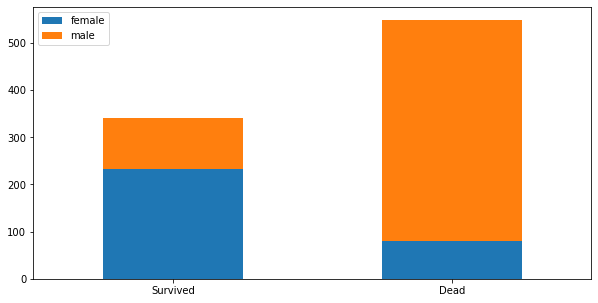

In [11]:
bar_chart('Sex')

In [12]:
train[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [13]:
sex = pd.crosstab(train['Survived'], train['Sex'], margins=True)
chi2_contingency(sex)

(263.05057407065567,
 1.0036732821369117e-55,
 4,
 array([[193.47474747, 355.52525253, 549.        ],
        [120.52525253, 221.47474747, 342.        ],
        [314.        , 577.        , 891.        ]]))

# 4.2 Pclass

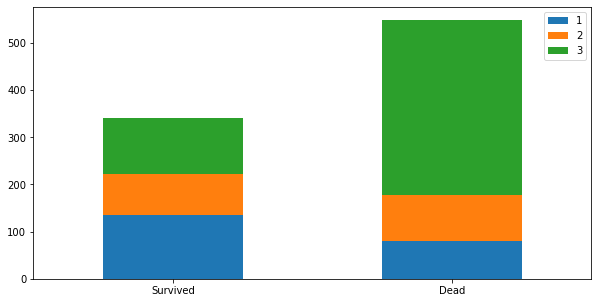

In [14]:
bar_chart('Pclass')

In [15]:
train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [16]:
pclass = pd.crosstab(train['Survived'], train['Pclass'], margins=True)
chi2_contingency(pclass)

(102.88898875696057,
 6.258462423531468e-20,
 6,
 array([[133.09090909, 113.37373737, 302.53535354, 549.        ],
        [ 82.90909091,  70.62626263, 188.46464646, 342.        ],
        [216.        , 184.        , 491.        , 891.        ]]))

# 4.3 SibSp

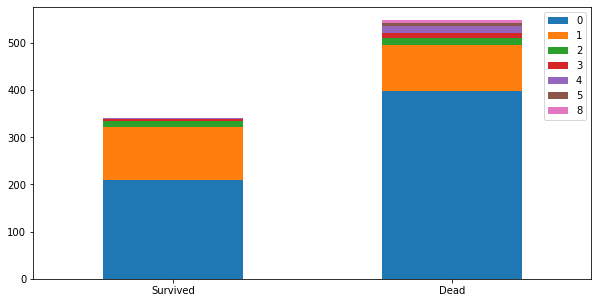

In [17]:
bar_chart('SibSp')

In [18]:
train[['SibSp', 'Survived']].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [19]:
SibSp = pd.crosstab(train['Survived'], train['SibSp'], margins=True)
chi2_contingency(SibSp)

(37.2717929152043,
 0.0006709654974933448,
 14,
 array([[374.62626263, 128.77777778,  17.25252525,   9.85858586,
          11.09090909,   3.08080808,   4.31313131, 549.        ],
        [233.37373737,  80.22222222,  10.74747475,   6.14141414,
           6.90909091,   1.91919192,   2.68686869, 342.        ],
        [608.        , 209.        ,  28.        ,  16.        ,
          18.        ,   5.        ,   7.        , 891.        ]]))

# 4.4 Parch

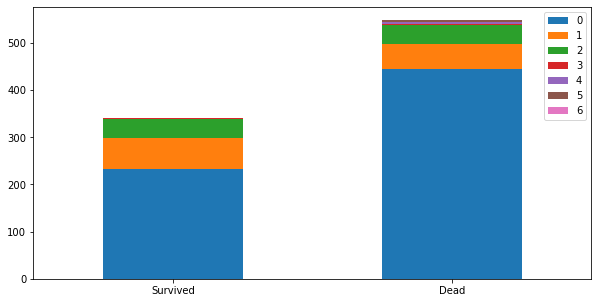

In [20]:
bar_chart('Parch')

In [21]:
train[['Parch', 'Survived']].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


In [22]:
Parch = pd.crosstab(train['Survived'], train['Parch'], margins=True)
chi2_contingency(Parch)

(27.925784060236165,
 0.014554047586837713,
 14,
 array([[4.17757576e+02, 7.27070707e+01, 4.92929293e+01, 3.08080808e+00,
         2.46464646e+00, 3.08080808e+00, 6.16161616e-01, 5.49000000e+02],
        [2.60242424e+02, 4.52929293e+01, 3.07070707e+01, 1.91919192e+00,
         1.53535354e+00, 1.91919192e+00, 3.83838384e-01, 3.42000000e+02],
        [6.78000000e+02, 1.18000000e+02, 8.00000000e+01, 5.00000000e+00,
         4.00000000e+00, 5.00000000e+00, 1.00000000e+00, 8.91000000e+02]]))

# 4.5 Embarked

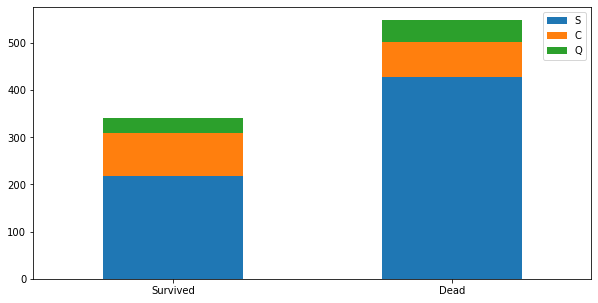

In [23]:
bar_chart('Embarked')

In [24]:
train[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


In [25]:
Embarked = pd.crosstab(train['Survived'], train['Embarked'], margins=True)
chi2_contingency(Embarked)

(26.48914983923762,
 0.00018045058101554096,
 6,
 array([[103.7480315,  47.5511811, 397.7007874, 549.       ],
        [ 64.2519685,  29.4488189, 246.2992126, 340.       ],
        [168.       ,  77.       , 644.       , 889.       ]]))

# 4.6 Age and Fare

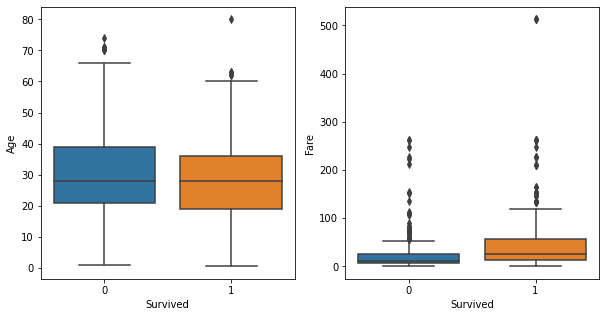

In [26]:
# Etude des variables quantitatives continues avec boxplot
fig = plt.figure(figsize=(10,5))
plt.subplot(121)
ax1 = sns.boxplot(x="Survived", y='Age', data=train)
plt.subplot(122)
ax2 = sns.boxplot(x="Survived", y='Fare', data=train)
plt.show()

In [27]:
# sns.lmplot(x="Fare", y="Age", hue="Survived", data=train, fit_reg=False)
# plt.show()

# 5. Les valeurs manquantes

In [28]:
# CREATION D'UNE FONCTION POUR DETERMINER LE NOMBRE ET LE POURCENTAGE DE VALEURS MANQUANTES
def missing_data (select, df):
    missing_data_count = df[select].isna().sum()
    missing_data_percent = df[select].isna().sum() / len(df[select]) * 100
    missing_data = pd.DataFrame({
        'Nombre_NaN': missing_data_count,
        '%_NaN': missing_data_percent
        })
    missing_data = missing_data[missing_data.Nombre_NaN > 0]
    missing_data.sort_values(by='Nombre_NaN', ascending=False, inplace=True)

    print(f"Il y a {missing_data.shape[0]} variables avec des valeurs manquantes.\n")
    return missing_data

In [29]:
# TRAIN DATA
missing_data(train.columns, train)

Il y a 3 variables avec des valeurs manquantes.



,Nombre_NaN,%_NaN
Cabin,687,77.104377
Age,177,19.865320
Embarked,2,0.224467


In [30]:
# TEST DATA
missing_data(test.columns, test)

Il y a 3 variables avec des valeurs manquantes.



,Nombre_NaN,%_NaN
Cabin,327,78.229665
Age,86,20.574163
Fare,1,0.239234


# 6. Traitement des variables

# 6.1 Cabin et Ticket

In [31]:
train = train.drop(['Ticket', 'Cabin'], axis=1)
test = test.drop(['Ticket', 'Cabin'], axis=1)

# 6.2 Embarked

In [32]:
train[train['Embarked'].isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,80.0,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,80.0,NaN


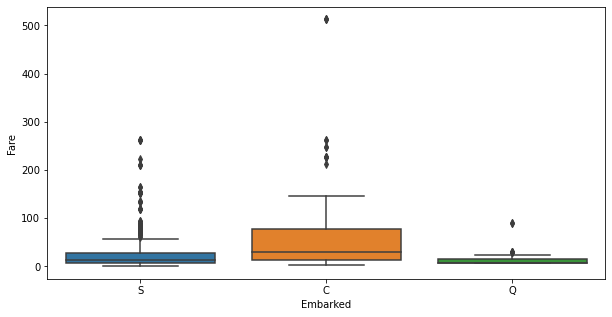

In [33]:
fig = plt.figure(figsize=(10,5))
ax3 = sns.boxplot(x="Embarked", y='Fare', data=train)

In [34]:
train[['Embarked', 'Fare']].groupby(by='Embarked').mean()

,Fare
Embarked,
C,59.954144
Q,13.276030
S,27.079812


In [35]:
train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [36]:
train['Embarked'] = train['Embarked'].fillna('S')
train['Embarked'].isna().sum()

0

# 6.3 Fare

In [37]:
test[test['Fare'].isna()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,NaN,S


In [38]:
test['Fare'][test['Embarked'] == 'S'].describe()

count    269.000000
mean      28.230436
std       39.899155
min        0.000000
25%        8.050000
50%       13.775000
75%       26.550000
max      263.000000
Name: Fare, dtype: float64

In [39]:
test['Fare'] = test['Fare'].fillna(0)
test['Fare'].isna().sum()

0

In [40]:
# Création d'une variable correspondant à des classes de prix du billet
train['Fare_class'] = pd.cut(train['Fare'], 4)
train[['Fare_class', 'Survived']].groupby(['Fare_class'], as_index=False).mean().sort_values(by='Fare_class', ascending=True)

,Fare_class,Survived
0,"(-0.512, 128.082]",0.368113
1,"(128.082, 256.165]",0.724138
2,"(256.165, 384.247]",0.666667
3,"(384.247, 512.329]",1.000000


In [41]:
train_test = [train, test]

for dataset in train_test:  
    dataset['Fare_class'] = 0
    dataset.loc[ dataset['Fare'] <= 128, 'Fare_class'] = 0
    dataset.loc[(dataset['Fare'] > 128) & (dataset['Fare'] <= 256), 'Fare_class'] = 1
    dataset.loc[(dataset['Fare'] > 256) & (dataset['Fare'] <= 384), 'Fare_class'] = 2
    dataset.loc[ dataset['Fare'] > 384, 'Fare_class'] = 3

# 6.4 Name

In [42]:
# Assemblage des 2 dataset

for dataset in train_test:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

pd.crosstab(train['Title'], train['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [43]:
pd.crosstab(test['Title'], test['Sex'])

Sex,female,male
Title,,
Col,0,2
Dona,1,0
Dr,0,1
Master,0,21
Miss,78,0
Mr,0,240
Mrs,72,0
Ms,1,0
Rev,0,2


In [44]:
for dataset in train_test:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    
train[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.347826


In [45]:
train[['Title', 'Age']].groupby(['Title']).mean().sort_values(by='Age', ascending=False)

,Age
Title,
Rare,45.545455
Mrs,35.788991
Mr,32.368090
Miss,21.845638
Master,4.574167


# 6.5 Age

In [46]:
for dataset in train_test:
    train['Age'][(train['Title'] == 'Mr') & (train['Age'].isna())] = math.floor(train['Age'][train['Title']=='Mr'].mean())
    train['Age'][(train['Title'] == 'Mrs') & (train['Age'].isna())] = math.floor(train['Age'][train['Title']=='Mrs'].mean())
    train['Age'][(train['Title'] == 'Miss') & (train['Age'].isna())] = math.floor(train['Age'][train['Title']=='Miss'].mean())
    train['Age'][(train['Title'] == 'Master') & (train['Age'].isna())] = math.floor(train['Age'][train['Title']=='Master'].mean())
    train['Age'][(train['Title'] == 'Rare') & (train['Age'].isna())] = math.floor(train['Age'][train['Title']=='Rare'].mean())

In [47]:
# Création de 5 classes d'âge
train['Age_class'] = pd.cut(train['Age'], 5)
train[['Age_class', 'Survived']].groupby(['Age_class'], as_index=False).mean().sort_values(by='Age_class', ascending=True)

,Age_class,Survived
0,"(0.34, 16.336]",0.548077
1,"(16.336, 32.252]",0.327345
2,"(32.252, 48.168]",0.436893
3,"(48.168, 64.084]",0.434783
4,"(64.084, 80.0]",0.090909


In [48]:
for dataset in train_test:  
    dataset['Age_class'] = 0
    dataset.loc[ dataset['Age'] <= 16, 'Age_class'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age_class'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age_class'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age_class'] = 3
    dataset.loc[ dataset['Age'] > 64, 'Age_class'] = 4

In [49]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Fare_class,Title,Age_class
0,1,0,3,"Braund, Mr. Owen Harris",male,22.00,1,0,7.2500,S,0,Mr,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00,1,0,71.2833,C,0,Mrs,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.00,0,0,7.9250,S,0,Miss,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00,1,0,53.1000,S,0,Mrs,2
4,5,0,3,"Allen, Mr. William Henry",male,35.00,0,0,8.0500,S,0,Mr,2
5,6,0,3,"Moran, Mr. James",male,32.00,0,0,8.4583,Q,0,Mr,1
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.00,0,0,51.8625,S,0,Mr,3
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.00,3,1,21.0750,S,0,Master,0
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.00,0,2,11.1333,S,0,Mrs,1
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.00,1,0,30.0708,C,0,Mrs,0


# 6.6 SibSp et Parch

In [50]:
for dataset in train_test:
    dataset['FamilySize'] = 0
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1

train[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,FamilySize,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.136364
7,8,0.000000
8,11,0.000000


In [51]:
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Fare_class,Title,Age_class,FamilySize
0,892,3,"Kelly, Mr. James",male,34.50,0,0,7.8292,Q,0,Mr,2,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.00,1,0,7.0000,S,0,Mrs,2,2
2,894,2,"Myles, Mr. Thomas Francis",male,62.00,0,0,9.6875,Q,0,Mr,3,1
3,895,3,"Wirz, Mr. Albert",male,27.00,0,0,8.6625,S,0,Mr,1,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.00,1,1,12.2875,S,0,Mrs,1,3
5,897,3,"Svensson, Mr. Johan Cervin",male,14.00,0,0,9.2250,S,0,Mr,0,1
6,898,3,"Connolly, Miss. Kate",female,30.00,0,0,7.6292,Q,0,Miss,1,1
7,899,2,"Caldwell, Mr. Albert Francis",male,26.00,1,1,29.0000,S,0,Mr,1,3
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.00,0,0,7.2292,C,0,Mrs,1,1
9,901,3,"Davies, Mr. John Samuel",male,21.00,2,0,24.1500,S,0,Mr,1,3


# 6.7 Encodage des variables Sex, Embarked et Title

In [52]:
from sklearn.preprocessing import OrdinalEncoder
#pd.set_option('display.max_columns', None)
enc = OrdinalEncoder()
train[['Sex', 'Embarked', 'Title']] = enc.fit_transform(train[['Sex', 'Embarked', 'Title']])
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Fare_class,Title,Age_class,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",1.0,22.00,1,0,7.2500,2.0,0,2.0,1,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0.0,38.00,1,0,71.2833,0.0,0,3.0,2,2
2,3,1,3,"Heikkinen, Miss. Laina",0.0,26.00,0,0,7.9250,2.0,0,1.0,1,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0.0,35.00,1,0,53.1000,2.0,0,3.0,2,2
4,5,0,3,"Allen, Mr. William Henry",1.0,35.00,0,0,8.0500,2.0,0,2.0,2,1
5,6,0,3,"Moran, Mr. James",1.0,32.00,0,0,8.4583,1.0,0,2.0,1,1
6,7,0,1,"McCarthy, Mr. Timothy J",1.0,54.00,0,0,51.8625,2.0,0,2.0,3,1
7,8,0,3,"Palsson, Master. Gosta Leonard",1.0,2.00,3,1,21.0750,2.0,0,0.0,0,5
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",0.0,27.00,0,2,11.1333,2.0,0,3.0,1,3
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",0.0,14.00,1,0,30.0708,0.0,0,3.0,0,2


In [53]:
test[['Sex', 'Embarked', 'Title']] = enc.fit_transform(test[['Sex', 'Embarked', 'Title']])
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Fare_class,Title,Age_class,FamilySize
0,892,3,"Kelly, Mr. James",1.0,34.50,0,0,7.8292,1.0,0,2.0,2,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0.0,47.00,1,0,7.0000,2.0,0,3.0,2,2
2,894,2,"Myles, Mr. Thomas Francis",1.0,62.00,0,0,9.6875,1.0,0,2.0,3,1
3,895,3,"Wirz, Mr. Albert",1.0,27.00,0,0,8.6625,2.0,0,2.0,1,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0.0,22.00,1,1,12.2875,2.0,0,3.0,1,3
5,897,3,"Svensson, Mr. Johan Cervin",1.0,14.00,0,0,9.2250,2.0,0,2.0,0,1
6,898,3,"Connolly, Miss. Kate",0.0,30.00,0,0,7.6292,1.0,0,1.0,1,1
7,899,2,"Caldwell, Mr. Albert Francis",1.0,26.00,1,1,29.0000,2.0,0,2.0,1,3
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",0.0,18.00,0,0,7.2292,0.0,0,3.0,1,1
9,901,3,"Davies, Mr. John Samuel",1.0,21.00,2,0,24.1500,2.0,0,2.0,1,3


In [54]:
# Suppression des colonnes inutiles à ce stade
train = train.drop(['Name', 'Age', 'Fare', 'SibSp', 'Parch'], axis=1)
test = test.drop(['Name', 'Age', 'Fare', 'SibSp', 'Parch'], axis=1)

In [55]:
train.head()

,PassengerId,Survived,Pclass,Sex,Embarked,Fare_class,Title,Age_class,FamilySize
0,1,0,3,1.0,2.0,0,2.0,1,2
1,2,1,1,0.0,0.0,0,3.0,2,2
2,3,1,3,0.0,2.0,0,1.0,1,1
3,4,1,1,0.0,2.0,0,3.0,2,2
4,5,0,3,1.0,2.0,0,2.0,2,1


In [56]:
test.head()

,PassengerId,Pclass,Sex,Embarked,Fare_class,Title,Age_class,FamilySize
0,892,3,1.0,1.0,0,2.0,2,1
1,893,3,0.0,2.0,0,3.0,2,2
2,894,2,1.0,1.0,0,2.0,3,1
3,895,3,1.0,2.0,0,2.0,1,1
4,896,3,0.0,2.0,0,3.0,1,3


# 7. Modélisation

# 7.1 Avec l'ensemble des variables sélectionnées

In [57]:
# Les variables à tester sont:
select = ['Pclass', 'Sex', 'Embarked', 'Fare_class', 'Title', 'Age_class', 'FamilySize']
# La variable cible est: 'Survived'

In [58]:
X_train = train[select]
Y_train = train["Survived"]
X_test  = test[select].copy()

In [59]:
def tts():
    models =[("Logistic regression", LogisticRegression()),('KNN',KNeighborsClassifier()),
             ("Decision tree", DecisionTreeClassifier()),('Random forest',RandomForestClassifier())]

    score_list = []
    model_name_list = []

    for name ,model in models:
        model.fit(X_train, Y_train)
        Y_pred = model.predict(X_test)
        score = round(model.score(X_train, Y_train) * 100, 2) 
        score_list.append(score)
        model_name_list.append(name)
    
    print(f'X_train Shape: {X_train.shape}, y_train Shape: {Y_train.shape}, X_test Shape: {X_test.shape} ')

    df_result = pd.DataFrame(columns = ['Model', 'Précision (%)'])
    df_result['Model'] = model_name_list
    df_result['Précision (%)'] = score_list
    return df_result.sort_values(by=['Précision (%)'], ascending = False)

In [60]:
tts()

X_train Shape: (891, 7), y_train Shape: (891,), X_test Shape: (418, 7) 


,Model,Précision (%)
2,Decision tree,86.76
3,Random forest,86.76
1,KNN,83.50
0,Logistic regression,79.12


# 7.2 Cross validation avec K-fold sur la totalité des variables sélectionnées

In [67]:
def model_ml (params_list, model_type, x):
    avg_accuracy_list = []
    kfold_accuracy_max = []
    nb_fold = list(range(2, x))
    for fold in nb_fold:
        kfold = KFold(fold, random_state=42, shuffle=True)
        results = cross_val_score(model_type, train[params_list], train['Survived'], cv=kfold, scoring = 'accuracy')
        accuracy_mean = results.mean()*100.0
        avg_accuracy_list.append(accuracy_mean)
    avg_accuracy_max = np.max(avg_accuracy_list)
    best_kfold = avg_accuracy_list.index(max(avg_accuracy_list)) + 2
    kfold_accuracy_max.append((avg_accuracy_max, best_kfold))
    
    print(f'Le accurancy max est de {avg_accuracy_max} pour un kfold de {avg_accuracy_list.index(max(avg_accuracy_list)) + 2}')
    #return kfold_accuracy_max

In [69]:
model_ml(select, LogisticRegression(), 52)

Le accurancy max est de 78.89851735143215 pour un kfold de 4


In [71]:
model_ml(select, KNeighborsClassifier(), 52)

Le accurancy max est de 81.70983632607658 pour un kfold de 31


In [72]:
model_ml(select, DecisionTreeClassifier(), 52)

Le accurancy max est de 81.4831294030404 pour un kfold de 29


In [73]:
model_ml(select, RandomForestClassifier(), 52)

Le accurancy max est de 81.8131256952169 pour un kfold de 31


# 7.3 Etude des différentes combinaisons de variables

In [76]:
def model(params, model_type):
    model = model_type
    model.fit(train[params], train['Survived'])
    Y_pred = model.predict(test[params])
    acc_model = round(model.score(train[params], train['Survived']) * 100, 2)
    return acc_model

In [82]:
def best_combination(model_type):
    #select=[c for c in df_norm.columns if c!= 'Potability']
    dico = {}
    for i in range(1, len(select)+1):
        for k in combinations(select,i):
            #print(list(k))
            #print(model_reg_log(list(k)))
            dico[k] = model(list(k), model_type)
    #dico 
    for k in dico:
        best_model = max(dico.items(), key=operator.itemgetter(1))[0]
        best_accurancy = max(dico.items(), key=operator.itemgetter(1))[1]
        #best_kfold = max(dico.items(), key=operator.itemgetter(1))[1][0][1]
    print(f'Les variables les plus performantes sont {list(best_model)} avec une précision de {round(best_accurancy,2)} %')

In [83]:
best_combination(LogisticRegression())

Les variables les plus performantes sont ['Pclass', 'Sex', 'Fare_class', 'FamilySize'] avec une précision de 80.25 %


In [84]:
best_combination(KNeighborsClassifier())

Les variables les plus performantes sont ['Pclass', 'Sex', 'Embarked', 'Title', 'Age_class', 'FamilySize'] avec une précision de 83.73 %


In [85]:
best_combination(DecisionTreeClassifier())

Les variables les plus performantes sont ['Pclass', 'Sex', 'Embarked', 'Fare_class', 'Title', 'Age_class', 'FamilySize'] avec une précision de 86.76 %


In [86]:
best_combination(RandomForestClassifier())

Les variables les plus performantes sont ['Pclass', 'Sex', 'Embarked', 'Fare_class', 'Title', 'Age_class', 'FamilySize'] avec une précision de 86.76 %


# 7.4 Etude des hyper-paramètres avec Grid Search

In [88]:
def hyper_params(select, params_grid_selection, model):   
    X_train = train[select]
    y_train = train['Survived']
    grid = GridSearchCV(model , params_grid_selection, scoring = 'accuracy')
    grid.fit(X_train, y_train)
    model_estimator = grid.best_estimator_
    print(model)
    print(grid.best_score_)
    print(grid.best_params_)
    return model_estimator

# 7.4.1. Logistic regression

In [90]:
hyper_params(['Pclass', 'Sex', 'Fare_class', 'FamilySize'], 
             {'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']},
             LogisticRegression())

LogisticRegression()
0.7968300797187873
{'solver': 'newton-cg'}


LogisticRegression(solver='newton-cg')

In [91]:
model(['Pclass', 'Sex', 'Fare_class', 'FamilySize'], LogisticRegression(solver='newton-cg'))

80.25

# 7.4.2. KNN

In [92]:
hyper_params(['Pclass', 'Sex', 'Embarked', 'Title', 'Age_class', 'FamilySize'], 
             {'n_neighbors': np.arange(1,50),
              'metric':['euclidean','manhattan']},
             KNeighborsClassifier())

KNeighborsClassifier()
0.8305191136777352
{'metric': 'manhattan', 'n_neighbors': 30}


KNeighborsClassifier(metric='manhattan', n_neighbors=30)

In [94]:
model(['Pclass', 'Sex', 'Embarked', 'Title', 'Age_class', 'FamilySize'], KNeighborsClassifier(metric='manhattan', n_neighbors=30))


83.61

# 7.4.3. Decision tree

In [95]:
hyper_params(['Pclass', 'Sex', 'Embarked', 'Fare_class', 'Title', 'Age_class', 'FamilySize'], 
             {'criterion': ['gini', 'entropy'],
              'max_depth': np.arange(1,100),
              'max_features': ['auto', 'sqrt', 'log2']}, 
             DecisionTreeClassifier())

DecisionTreeClassifier()
0.8327537505492435
{'criterion': 'gini', 'max_depth': 6, 'max_features': 'log2'}


DecisionTreeClassifier(max_depth=6, max_features='log2')

In [96]:
model(['Pclass', 'Sex', 'Embarked', 'Fare_class', 'Title', 'Age_class', 'FamilySize'], DecisionTreeClassifier(max_depth=6, max_features='log2'))


82.38

# 7.4.4. Random forest

In [98]:
hyper_params(['Pclass', 'Sex', 'Embarked', 'Fare_class', 'Title', 'Age_class', 'FamilySize'], 
             {'criterion': ['gini', 'entropy'],
              'max_depth': np.arange(1,10),
              'max_features': ['auto', 'sqrt', 'log2']},
             RandomForestClassifier())

RandomForestClassifier()
0.8327600276191074
{'criterion': 'gini', 'max_depth': 4, 'max_features': 'sqrt'}


RandomForestClassifier(max_depth=4, max_features='sqrt')

In [99]:
model(['Pclass', 'Sex', 'Embarked', 'Fare_class', 'Title', 'Age_class', 'FamilySize'], RandomForestClassifier(max_depth=4, max_features='sqrt'))


83.73

# 8. Conclusion

In [100]:
ar = np.array([[79.12, 78.89, 80.25, 80.25], [83.50, 81.70, 83.73, 83.61], [86.76, 81.48, 86.76, 82.38], [86.76, 81.81, 86.76, 83.73]])
df_1 = pd.DataFrame(ar, index = ['Logistic regression', 'KNN', 'Decision tree', 'Random forest'], columns = ['All Features', '+ kfold optimal', 'Combination', 'Hyper-parameters'])
df_1

,All Features,+ kfold optimal,Combination,Hyper-parameters
Logistic regression,79.12,78.89,80.25,80.25
KNN,83.50,81.70,83.73,83.61
Decision tree,86.76,81.48,86.76,82.38
Random forest,86.76,81.81,86.76,83.73


# 9. Submission

In [168]:
def prediction (model, select):
    model.fit(train[select], train['Survived'])
    Y_pred = model.predict(test[select])
    acc_log = round(model.score(train[select], train['Survived']) * 100, 2)
    print(f'Accuracy: {acc_log}%')
    submission = pd.DataFrame({
        "PassengerId": test["PassengerId"],
        "Survived": Y_pred})
    submission.to_csv(f'submission_{model}.csv', index=False)
    return submission

In [169]:
prediction(LogisticRegression(), ['Pclass', 'Sex', 'Fare_class', 'FamilySize'])

Accuracy: 80.25%


,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
5,897,0
6,898,1
7,899,0
8,900,1
9,901,0


In [170]:
prediction(KNeighborsClassifier(), ['Pclass', 'Sex', 'Embarked', 'Title', 'Age_class', 'FamilySize'])

Accuracy: 83.73%


,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
5,897,0
6,898,1
7,899,0
8,900,1
9,901,0


In [171]:
prediction(DecisionTreeClassifier(), ['Pclass', 'Sex', 'Embarked', 'Fare_class', 'Title', 'Age_class', 'FamilySize'])

Accuracy: 86.76%


,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,0
5,897,0
6,898,1
7,899,0
8,900,1
9,901,0


In [172]:
prediction(RandomForestClassifier(), ['Pclass', 'Sex', 'Embarked', 'Fare_class', 'Title', 'Age_class', 'FamilySize'])

Accuracy: 86.76%


,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
5,897,0
6,898,1
7,899,0
8,900,1
9,901,0
